# DS 3000 - Assignment 10

**Student Name**: Bella Chin

**Date**: 11/4/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

In this assignment, you will build a machine learning model to predict birth weight using the Babies dataset. Here is a link to the accompanying data dictionaryLinks to an external site. Ensure that you explain each step and the results from each question. 

load the data directly from the URL into a DataFrame.


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math 
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
# load the babies dataset & check if imported correctly
babies_df = pd.read_csv('https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K')
print(babies_df.head())

   case  bwt  gestation  parity   age  height  weight  smoke
0     1  120      284.0       0  27.0    62.0   100.0    0.0
1     2  113      282.0       0  33.0    64.0   135.0    0.0
2     3  128      279.0       0  28.0    64.0   115.0    1.0
3     4  123        NaN       0  36.0    69.0   190.0    0.0
4     5  108      282.0       0  23.0    67.0   125.0    1.0


I loaded the data using the required url and set it to a variable called babies_df. I displayed a brief part of the data set to make sure it was loaded correctly. I noticed there were missing value swhich moves us on to Question 2 where we performing our EDA steps and data preparations.

## Question 2: 
Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:
    * Perform EDA using the dataset to demonstrate patterns.
    * Handle any missing data and invalid data. Justify your approach.
    * Plot a histogram of the birth weight and explain the overall distribution. 

case          0
bwt           0
gestation     0
parity        0
age           0
height        0
weight        0
smoke        10
dtype: int64
smoke        0.844595
case         0.000000
bwt          0.000000
gestation    0.000000
parity       0.000000
age          0.000000
height       0.000000
weight       0.000000
dtype: float64
671     1
665     1
600     1
218     1
255     1
       ..
420     0
419     0
418     0
417     0
1235    0
Length: 1184, dtype: int64
case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64
case         0.0
bwt          0.0
gestation    0.0
parity       0.0
age          0.0
height       0.0
weight       0.0
smoke        0.0
dtype: float64
0       0
820     0
836     0
835     0
834     0
       ..
418     0
417     0
416     0
415     0
1235    0
Length: 1174, dtype: int64
Varible types before converting:
 case           int64
bwt            int64
gestation    float64
parity       

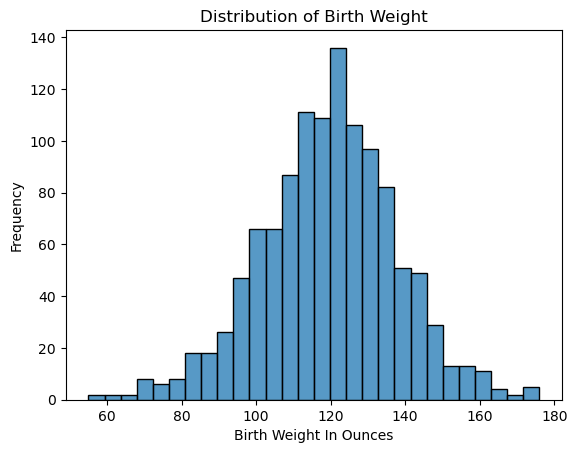

In [7]:
# making sure certain data is not below 0 since it is invalid
babies_df = babies_df[babies_df['age'] > 0]
babies_df = babies_df[babies_df['gestation'] >= 0]
babies_df = babies_df[babies_df['bwt'] > 0]
babies_df = babies_df[babies_df['height'] > 0]
babies_df = babies_df[babies_df['weight'] > 0]

# check for missing values
print(babies_df.isnull().sum())

# seeing the percentage of missing values in each column
print((babies_df.isnull().mean()*100).sort_values(ascending = False))

# seeing how many missing values there can be in a single row at any time
print(babies_df.isnull().sum(axis=1).sort_values(ascending=False))

# getting rid of the rest of the missing values since they only make up about ~.8% of the data in that column
babies_df = babies_df.dropna()

# checking everything worked
print(babies_df.isnull().sum().sort_values(ascending=False))
print((babies_df.isnull().mean()*100).sort_values(ascending=False))
print(babies_df.isnull().sum(axis=1).sort_values(ascending=False))

# check the dataset variable types & convert to the suitable types
print('Varible types before converting:\n', babies_df.dtypes)

babies_df['gestation'] = babies_df['gestation'].astype('int64')
babies_df['age'] = babies_df['age'].astype('int64')
babies_df['parity'] = babies_df['parity'].astype('category')
babies_df['smoke'] = babies_df['smoke'].astype('category')

# check the dataset variable types after
print('Varible types after converting:\n', babies_df.dtypes)

# plot histogram of birth weight
sns.histplot(data = babies_df['bwt'])
plt.xlabel('Birth Weight In Ounces')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Weight')
plt.show()

After loading in the data and viewing a brief section of the dataset, I noticed there were missing values. Initially, I made sure that the dataset did not contain invalid data based on the domain knowledge (age, height, and weight being below 0 and filtered the dataset so it did not include this. After, I checked how many missing values were in the dataset and removed them since it was an insignificant amount of data since it was about 0.8%. Then, I checked the data types of the variables of the data set and converted them to its suitable data types based off the data dictionary given. 

The histogram of the distribution of birth weight shows a pretty normal distribution with a peak in about 120 ounces. This indicates that 120 ounces is the most common birth weight in the data set. The weights range from about 60 to 180 ounces, with the frequencies of birth weights decreasing as they move away from the center of the graph.

## Question 3

Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected.  Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
    * Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
    * Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.

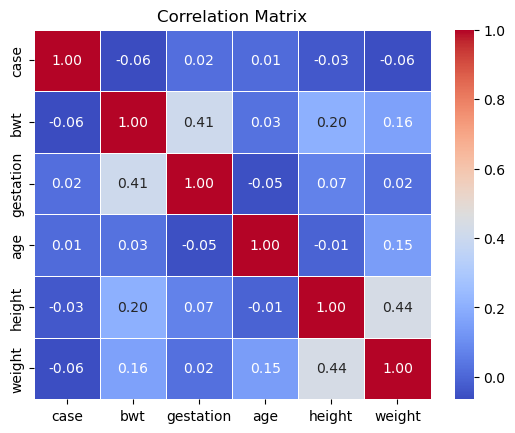

In [10]:
# visualize the correlation matrix
numeric_df = babies_df.select_dtypes(include=[float, int])  #pandas doc for select dtypes
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #seaborn documentation
plt.title('Correlation Matrix')
plt.show()

In [11]:
# perform chi-square test for categorical features to see which featuers are useful
categorical_var = ['smoke', 'parity']

# chi-square test for smoking status & parity
for cat_var in categorical_var:
    catvar_status = babies_df.groupby(cat_var)['bwt'].value_counts().unstack(fill_value=0)
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(catvar_status)
    print(f'{cat_var}:\n Chi-Square Stat: {chi2_stat.round(2)},', f'P-value: {p_val:.2e}')

    if p_val < 0.05:
        print(f'{cat_var} status is a significant predictor of birth weight.')
    else:
        print(f'{cat_var} status is not a significant predictor of birth weight.')

smoke:
 Chi-Square Stat: 172.73, P-value: 4.56e-05
smoke status is a significant predictor of birth weight.
parity:
 Chi-Square Stat: 102.33, P-value: 5.83e-01
parity status is not a significant predictor of birth weight.


/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_79639/172301246.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  catvar_status = babies_df.groupby(cat_var)['bwt'].value_counts().unstack(fill_value=0)
/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_79639/172301246.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  catvar_status = babies_df.groupby(cat_var)['bwt'].value_counts().unstack(fill_value=0)


In [12]:
# perform anova test for categorical features 
for categor_var in categorical_var:
    f_stat, p_value = stats.f_oneway(
        babies_df[(babies_df[categor_var] == 0)]['bwt'],
        babies_df[(babies_df[categor_var] == 1)]['bwt'],
    )

    # print result
    print(f'{categor_var}:\nF-statistic: {f_stat:.2f}')
    print(f'P-value: {p_value:.2e}')

    # determine if significant
    if p_value < 0.05:
        print(f'There is a statistically significant difference between birth weight and {categor_var}.')
    else:
        print(f'There is no statistically significant difference between birth weight and {categor_var}.')

smoke:
F-statistic: 76.02
P-value: 9.46e-18
There is a statistically significant difference between birth weight and smoke.
parity:
F-statistic: 2.26
P-value: 1.33e-01
There is no statistically significant difference between birth weight and parity.


In [13]:
continuous_var = ['gestation', 'age', 'weight', 'height']

# perform pearson correlation for continuous features 
for var in continuous_var:
    # calculate pearson correlation for gestation 
    corr_coeff, p_value = stats.pearsonr(babies_df[var], babies_df['bwt'])
    print(f'The Pearson Correlation Coefficient of {var} and birth weight is {corr_coeff:.2f}.')
    print(f'The p-value of {var} and birth weight is {p_value:.2f}.')

The Pearson Correlation Coefficient of gestation and birth weight is 0.41.
The p-value of gestation and birth weight is 0.00.
The Pearson Correlation Coefficient of age and birth weight is 0.03.
The p-value of age and birth weight is 0.36.
The Pearson Correlation Coefficient of weight and birth weight is 0.16.
The p-value of weight and birth weight is 0.00.
The Pearson Correlation Coefficient of height and birth weight is 0.20.
The p-value of height and birth weight is 0.00.


For Question 3, I used four tests: two for categorical variables and two for continuous variables. For continuous variables, I used a correlation matrix and Pearson correlation test, which showed gestation had the strongest relationship with birth weight, while weight and height had weaker but significant correlations, and age had no significant correlation. For categorical variables, I used ANOVA and Chi-Square tests. The Chi-Square test revealed a strong association between smoking status and birth weight (chi-square: 172.73, p-value: 4.56e-05), indicating smoking as a strong predictor. Parity, however, showed a weaker association (p-value: 5.83e-01). ANOVA confirmed smoking’s significance with a high F-statistic (76.02, p-value: 9.46e-18) but found parity non-significant. Overall, gestation and smoking were identified as the most useful predictors of birth weight, with weight and height as potential additional predictors, while age was deemed non-significant.

## Question 4
 Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.

In [16]:
# Show the original data frame
print(f'Original Data:\n{babies_df}\n')

# Define categorical columns of features chosen
categorical_col = ['smoke']

# get input features & target
X = babies_df[['gestation','smoke']] 
y = babies_df['bwt'] 

# partition the prepared data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, #input features
                                                    y, # label
                                                    test_size = 0.3, #set 30% aside as test set
                                                    random_state = 7) # reproduce results

# Initialize the encoder for the categorical feature (geeksforgeeks onehotencoder)
encoder = OneHotEncoder(sparse_output = False)

# Fit and transform the categorical col into training data
X_train_encoded = encoder.fit_transform(X_train[categorical_col])

# transform categorical col into test data
X_test_encoded = encoder.transform(X_test[categorical_col])

# Convert encoded data to DataFrames 
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_col))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_col))

# reset indicies
X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)

X_train_encoded_df.reset_index(inplace = True, drop = True)
X_test_encoded_df.reset_index(inplace = True, drop = True)


# Merge encoded columns back to the original data (dropping 'smoke' in the process)
X_train_final = pd.concat([X_train.drop(categorical_col, axis=1), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(categorical_col, axis=1), X_test_encoded_df], axis=1)

print(f"Training Set after One-Hot Encoding:\n{X_train_final}\n")
print(f"Test Set after One-Hot Encoding:\n{X_test_final}\n")


Original Data:
      case  bwt  gestation parity  age  height  weight smoke
0        1  120        284      0   27    62.0   100.0   0.0
1        2  113        282      0   33    64.0   135.0   0.0
2        3  128        279      0   28    64.0   115.0   1.0
4        5  108        282      0   23    67.0   125.0   1.0
5        6  136        286      0   25    62.0    93.0   0.0
...    ...  ...        ...    ...  ...     ...     ...   ...
1231  1232  113        275      1   27    60.0   100.0   0.0
1232  1233  128        265      0   24    67.0   120.0   0.0
1233  1234  130        291      0   30    65.0   150.0   1.0
1234  1235  125        281      1   21    65.0   110.0   0.0
1235  1236  117        297      0   38    65.0   129.0   0.0

[1174 rows x 8 columns]

Training Set after One-Hot Encoding:
     gestation  smoke_0.0  smoke_1.0
0          278        1.0        0.0
1          279        0.0        1.0
2          277        1.0        0.0
3          276        1.0        0.0
4    

The data preparation involved several key steps. First, the original dataset was displayed, and the input features gestation and smoke were defined, along with the target bwt. The data was then split into training and test sets. Since smoke was categorical, it was encoded using OneHotEncoder to convert it into two binary columns (smoke_0.0 for non-smokers and smoke_1.0 for smokers). These encoded columns were converted into DataFrames, reset to align indexes, and merged back with the numerical gestation column after dropping the original smoke column. This resulted in final training and test sets with separate columns for each smoking status, preparing the data for effective machine learning modeling.

After one-hot encoding, the smoke column was split into two binary columns, smoke_0.0 and smoke_1.0, where each row has a 1.0 in only one of these columns to indicate smoking status. This transformation prepares the categorical data for machine learning, allowing the model to interpret the smoking variable as distinct categories without assuming an ordinal relationship. The resulting training and test sets now contain the gestation feature and separate columns for smoke status, enabling more effective modeling and predictions.

## Question 5
 Using the Random Forest algorithm, build a machine learning model that predicts the birth weight.  
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [19]:
# Random Forest Regressor since birth weight is a continuous varibale (geeks4geeks & lecture code)
rf = RandomForestRegressor(random_state = 7)
rf.fit(X_train, y_train)

# predict the labels (birth weight for the test set)
y_pred = rf.predict(X_test)

The Random Forest Regressor was used to predict birth weight, a continuous variable. The model was initialized with a random state for reproducibility and trained on the training set using .fit() with input features (X_train) and the target (y_train). After training, the model predicted birth weights for the test set using .predict(). The predicted values were displayed, allowing for evaluation of the model's performance by comparing the predictions with actual birth weights in the test set.

## Question 6
Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [22]:
# Evaluate the model (geeks4geeks random forest regression)
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse.round(2)}')
print(f'R-squared: {r2.round(2)}')
print(f'Mean Absolute Error (MAE): {mae.round(2)}')
print(f'Root Mean Squared Error (RMSE): {rmse.round(2)}')

Mean Squared Error (MSE): 292.91
R-squared: 0.15
Mean Absolute Error (MAE): 13.24
Root Mean Squared Error (RMSE): 17.11


To evaluate the Random Forest Regressor’s performance in predicting birth weight, four metrics were calculated: Mean Squared Error (MSE), R-squared (R²), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). I chose these to evaluate the Random Forest Regressor's predictions based on various online resources that recommended to use these for evaluations.

The model's performance metrics indicate room for improvement. The Mean Squared Error (297.62) and Root Mean Squared Error (17.25) suggest significant deviations from the true birth weights, with the average error around 17.25 units. The Mean Absolute Error (13.43) also highlights notable prediction errors, while the R-squared (0.14) shows that the model captures only 14% of the variance in birth weights, indicating a weak fit. 

## Question 7
What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight?
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.
Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation**Links to an external site. to learn more about this algorithm and its parameters. Try at least five different values for the n_estimators parameter to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
Indicate which model performed the best.

In [25]:
# tuning model using n_estimators
rsme_val = []
n_estimators = [100, 200, 300, 400, 500]

for n_estimator in n_estimators:
    # Create and train the model again but with specified estimators
    tuned_rf = RandomForestRegressor(n_estimators = n_estimator, random_state = 7)
    tuned_rf.fit(X_train, y_train)

    # Predict and evaluate again with specified estimators RMSE
    tuned_y_pred = tuned_rf.predict(X_test)
    rmse_tuned = np.sqrt(mean_squared_error (y_test, tuned_y_pred))
    rsme_val.append((n_estimator, rmse_tuned))
    print(f'RMSE for n_estimator of {n_estimator}: {rmse_tuned: .2f}')

# select the best model based on the n_estimator RMSE
best_n_estimator, best_rmse = sorted (rsme_val, key=lambda x: x[1]) [0]
print(f'The best model has an n_estimator of {best_n_estimator} with RMSE of{best_rmse: .2f}')

RMSE for n_estimator of 100:  17.11
RMSE for n_estimator of 200:  17.14
RMSE for n_estimator of 300:  17.15
RMSE for n_estimator of 400:  17.15
RMSE for n_estimator of 500:  17.17
The best model has an n_estimator of 100 with RMSE of 17.11


The model shows limited accuracy in predicting birth weight. With an R-squared of 0.14, it explains only a small part of the variance in birth weights, suggesting weak predictive power. The Mean Absolute Error (13.43) and Root Mean Squared Error (17.25) indicate that predictions are often far from actual values. This means the model's predictions aren’t very reliable. To improve, we could try adding more features, tuning model settings, or testing different algorithms.

This code tunes the Random Forest model by adjusting the number of trees (n_estimators) to find the best value for minimizing prediction error. For each specified value of n_estimators (100, 200, 300, 400, and 500), the model is re-trained and tested on the test set to calculate the Root Mean Squared Error (RMSE). Each RMSE result is stored, and after testing all values, the model with the lowest RMSE is selected as the best-performing version. This tuning process helps to identify the optimal number of trees for better accuracy.

The tuning results show that the model with 100 estimators has the lowest RMSE of 17.11, while increasing the number of trees beyond 100 slightly raises RMSE values. This suggests that adding more trees doesn’t improve accuracy and might lead to diminishing returns. Therefore, the model with 100 estimators is optimal for both performance and efficiency, though an RMSE around 17 suggests there’s room for improvement in prediction accuracy.

## Question 8
Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 5 different values of k. Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best.

Evaluation Metrics Before Tuning:
Mean Squared Error (MSE): 297.62
R-squared: 0.14
Mean Absolute Error (MAE): 13.43
Root Mean Squared Error (RMSE): 17.25
K: 24, Accuracy: 0.15, RMSE: 17.11, MSE: 292.58, R-squared: 0.15, MAE: 13.23
K: 25, Accuracy: 0.15, RMSE: 17.17, MSE: 294.67, R-squared: 0.15, MAE: 13.28
K: 26, Accuracy: 0.15, RMSE: 17.13, MSE: 293.50, R-squared: 0.15, MAE: 13.27
K: 27, Accuracy: 0.16, RMSE: 17.06, MSE: 291.09, R-squared: 0.16, MAE: 13.17
K: 28, Accuracy: 0.15, RMSE: 17.10, MSE: 292.30, R-squared: 0.15, MAE: 13.21
K: 29, Accuracy: 0.16, RMSE: 16.99, MSE: 288.78, R-squared: 0.16, MAE: 13.12
K: 30, Accuracy: 0.17, RMSE: 16.96, MSE: 287.48, R-squared: 0.17, MAE: 13.09
K: 31, Accuracy: 0.17, RMSE: 16.97, MSE: 288.00, R-squared: 0.17, MAE: 13.08
K: 32, Accuracy: 0.17, RMSE: 16.93, MSE: 286.56, R-squared: 0.17, MAE: 13.05
K: 33, Accuracy: 0.17, RMSE: 16.95, MSE: 287.17, R-squared: 0.17, MAE: 13.02
K: 34, Accuracy: 0.17, RMSE: 16.90, MSE: 285.63, R-squared: 0.17, MAE: 12.98

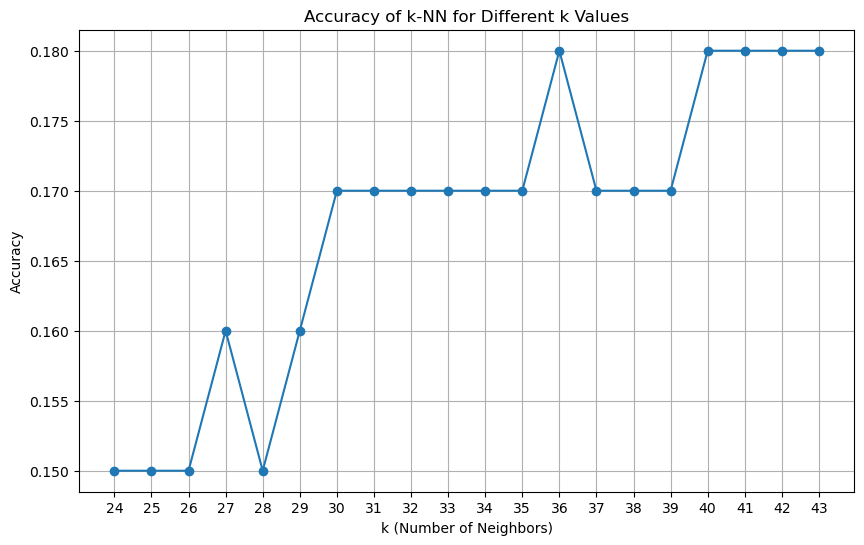

Best K: 43, Best RMSE: 16.82

K: 43, Accuracy: 0.18, RMSE: 16.82, MSE: 282.91, R-squared: 0.18


In [28]:
# Create a model for K Neighbor Regressor (geeks4geeks k neighbor regressor)
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

# predict the labels (birth weight for the test set)
knr_y_pred = knr.predict(X_test)

# Evaluate the model 
knr_mse = mean_squared_error(y_test, knr_y_pred)  
knr_r2 = r2_score(y_test, knr_y_pred)
knr_mae = mean_absolute_error(y_test, knr_y_pred)
knr_rmse = np.sqrt(mean_squared_error(y_test, knr_y_pred)).round(2)

# Print evaluation metrics
print(f'Evaluation Metrics Before Tuning:\nMean Squared Error (MSE): {knr_mse.round(2)}')
print(f'R-squared: {knr_r2.round(2)}')
print(f'Mean Absolute Error (MAE): {knr_mae.round(2)}')
print(f'Root Mean Squared Error (RMSE): {knr_rmse.round(2)}')


# get the optimal value of k using square root method
opt_k = int(math.sqrt(len(X)))
k_values = range(opt_k - 10, opt_k + 10)
accuracies = []
rmse_values = []
mse_values = []
r2_values = []
mae_values = []

# test each value of k
for k in k_values:
    # create and train the knn model with the specified number of neighbors
    tuned_knr = KNeighborsRegressor(n_neighbors = k) 
    tuned_knr.fit(X_train, y_train)

    # predict on test set
    tuned_knr_y_pred = tuned_knr.predict(X_test)

    # calculate accuracy and rsme
    accuracy = tuned_knr.score(X_test, y_test).round(2)
    tuned_knr_rmse = np.sqrt(mean_squared_error(y_test, tuned_knr_y_pred)).round(2)
    tuned_knr_mse = mean_squared_error(y_test, tuned_knr_y_pred)  
    tuned_knr_r2 = r2_score(y_test, tuned_knr_y_pred)
    tuned_knr_mae = mean_absolute_error(y_test, tuned_knr_y_pred)
    
    # append to respective lists
    accuracies.append(accuracy)
    rmse_values.append(tuned_knr_rmse)
    mse_values.append(tuned_knr_mse)
    r2_values.append(tuned_knr_r2)
    mae_values.append(tuned_knr_mae)

    print(f'K: {k}, Accuracy: {accuracy:.2f}, RMSE: {tuned_knr_rmse:.2f}, MSE: {tuned_knr_mse:.2f}, R-squared: {tuned_knr_r2:.2f}, MAE: {tuned_knr_mae:.2f}')
    
    
# plot the accuracy for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy of k-NN for Different k Values")
plt.xticks(k_values)
plt.grid()
plt.show()

# Determine the best value of k & best rmse
best_k, best_rmse = k_values[rmse_values.index(min(rmse_values))], min(rmse_values)

# Print best k & rmse
print(f'Best K: {best_k}, Best RMSE: {best_rmse:.2f}\n')

# tune the model based on the best k
best_knr = KNeighborsRegressor(n_neighbors=best_k)
best_knr.fit(X_train, y_train)
best_y_pred = best_knr.predict(X_test)

# calculate accuracy & rmse
best_accuracy = best_knr.score(X_test, y_test).round(2)
best_knr_rmse = np.sqrt(mean_squared_error(y_test, best_y_pred)).round(2)


# Evaluate the model
best_knr_mse = mean_squared_error(y_test, best_y_pred)
best_knr_r2 = r2_score(y_test, best_y_pred)

# Print evaluation metrics
print(f'K: {best_k}, Accuracy: {best_accuracy:.2f}, RMSE: {best_knr_rmse:.2f}, MSE: {best_knr_mse:.2f}, R-squared: {best_knr_r2:.2f}')

This code develops a k-Nearest Neighbors (k-NN) regression model to predict birth weights. First, an initial model is created with default settings, and its performance on test data is evaluated using Mean Squared Error (MSE), R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). To optimize the model, an ideal value of k is estimated using the square root of the dataset size. Then, for each value of k within a range around this estimate, a new k-NN model is trained and evaluated on the test set. For each model, key metrics are recorded. Afterward, the value of k with the lowest RMSE and highest accuracy is identified, and a final k-NN model is trained with this optimal k. The optimal model’s performance is evaluated and printed, showing metrics such as accuracy, RMSE, MSE, and R-squared. A plot is also generated to visualize accuracy across different values of k.

The k-NN regression model was initially evaluated, showing an RMSE of 17.25 and an R-squared of 0.14. I then tuned the model by testing values of k from 24 to 43. The results indicated that as k increased, the model's accuracy generally improved, with RMSE gradually decreasing. The best performance was observed at k = 43, where the RMSE was minimized to 16.82 and the R-squared improved slightly to 0.18, indicating a minor enhancement in the model's predictive capability. Overall, while tuning led to a small improvement, the model's R-squared value suggests that k-NN may still not be capturing all the variability in the data effectively.

## Question 9
 Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

The k-NN model (with k=43) has a slightly better performance than the Random Forest model, with a lower RMSE (16.82 vs. 17.11) and a higher R-squared (0.18 vs. 0.14). Both models, however, show low accuracy and high error, indicating they are not well-suited for predicting birth weight. Random Forest performs better overall due to its ability to handle complex data relationships, though both models need improvement. Given the results, Random Forest is more suitable for predicting birth weight, as it is more robust and has a slight edge in predictive power, despite the low performance of both models.

## Question 10
The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.

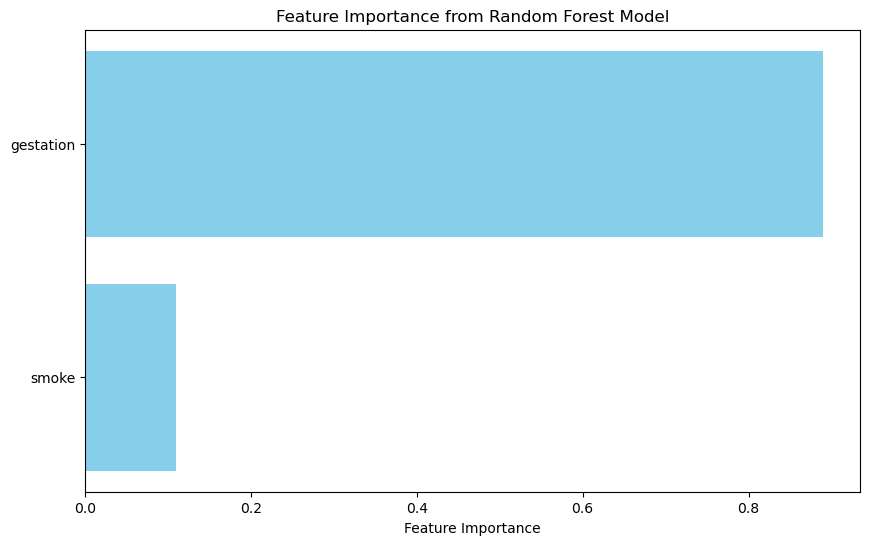

     Feature  Importance
0  gestation        0.89
1      smoke        0.11


In [33]:
# Access the feature importances (geeks4geeks feature importance with random forest)
best_rf = RandomForestRegressor(n_estimators = 100, random_state = 7)
best_rf.fit(X_train, y_train)

feature_importances = best_rf.feature_importances_

# Create a DataFrame to display features and their corresponding importance scores
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  
plt.show()

# Print the sorted feature importance
print(feature_df.round(2))

The feature importances from the trained Random Forest model are accessed using the .feature_importances_ attribute. A DataFrame is created to display each feature's name alongside its importance score. The features are then sorted in descending order of importance. A horizontal bar plot is generated to visually represent the importance of each feature, with the most important features at the top. Finally, the sorted feature importances are printed for review. This process helps identify which features most influence the model's predictions.

The Random Forest model’s feature importance analysis reveals that gestation is the dominant predictor with a score of 0.89, indicating it plays a significant role in determining the target variable. In contrast, smoke has a much lower importance score of 0.11, meaning its impact on predictions is relatively minor. This suggests that gestation factors heavily influence the outcome, while smoking behavior is less influential. If the goal is predictive accuracy, this is acceptable; however, if balanced feature influence is desired, it may be worth considering additional features or feature engineering techniques.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
